In [1]:
%matplotlib inline
import pprint  
import math
import numpy as np
import numpy.random as npr
import pandas as pd
import random
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.extmath import cartesian

In [2]:
Time_Worth = np.arange(0, 101)
#Time_Worth = 60

Car_Price = np.arange(0, 100001, 1000)
#Car_Price = 24000

#Annual_Miles_Avg = np.linspace(6000,12000,num = 61, endpoint= False)
Annual_Miles_Avg = 1000

##########add if statment to automatically pick 
variables = cartesian((Time_Worth, Car_Price)) #creates permutation of all inputs in a matrix

#Creates input_list with all permutations of the 2 variables plus constant third variable
nrow,ncol = variables.shape
input_list = np.ndarray(shape = (nrow,ncol+1))
input_list.fill(Annual_Miles_Avg)
input_list[:,:-1] = variables
input_list.astype(float)

##############################################################################################################
#EconomicParameters
Model_Length = 20 # as years
MPG = 25
Fuel_Price = 2.5  # as $/gal
Trip_Time_Avg = 10  # as num
Num_Trips_Avg = 3  # as num

MPG = float(MPG)    
Fuel_Price = float(Fuel_Price)
Trip_Time_Avg = float(Trip_Time_Avg)
Num_Trips_Avg = float(Num_Trips_Avg)

if isinstance(Time_Worth, np.ndarray):
    Time_Worth = [float(Time_Worth[i]) for i in range(0,Time_Worth.size-1)] 
else: 
    Time_Worth = float(Time_Worth)

if isinstance(Annual_Miles_Avg, np.ndarray):
    Annual_Miles_Avg = [float(Annual_Miles_Avg[i]) for i in range(0,Annual_Miles_Avg.size-1)] 
else:
    Annual_Miles_Avg = float(Annual_Miles_Avg)

if isinstance(Car_Price, np.ndarray):
    Car_Price = [float(Car_Price[i]) for i in range(0,Car_Price.size-1)] 
else:
    Car_Price = float(Car_Price)

#Global Inputs, Calculated
Daily_Miles_Avg = Annual_Miles_Avg/365   # as miles/day
Trip_Dist_Avg = Daily_Miles_Avg/Num_Trips_Avg
#Drive_Time_Avg = Trip_Time_Avg*Num_Trips_Avg   # as minutes
#Used in Car+_Ownership now

######################################################################################################################
#Traditional Car Ownership Model 
#Expenses to Purchase Car, Hardcoded
#Car_Price = 24000 #as $
Sales_Tax_Percent = .0625 #as decimal percent
Purchase_Fees = 250  # as $ for maybe title transfer
Down_Payment = 5000 #as $
Loan_Terms = 48 #as months
AIR = .05 #as decimal percent

Sales_Tax_Percent = float(Sales_Tax_Percent)
Purchase_Fees = float(Purchase_Fees)
Down_Payment = float(Down_Payment)
Loan_Terms = float(Loan_Terms)
AIR = float(AIR)
#Expenses to Purchase Car, Calculated
#Sales_Tax_Num = Car_Price*Sales_Tax_Percent #as $
#Loan_Amount = Car_Price - Down_Payment #as $
#used in car_ownership now
MIR = AIR/12
#Monthly_PMT = (MIR*Loan_Amount*(1+MIR)**Loan_Terms)/(((1+MIR)**Loan_Terms)-1)
#included in Car_Ownership Model

##################################################################################################################
#Direct Expenses to Own Car Avg'd over 10 years
Maint_Repairs_Exp = 1250 # as $
Insurance_Exp = 1000 # as $
Registr_Taxes_Exp = 150 # as $
Parking_Exp = 200 # as $
Maint_Repairs_Exp = float(Maint_Repairs_Exp)
Insurance_Exp = float(Insurance_Exp)
Registr_Taxes_Exp = float(Registr_Taxes_Exp)
Parking_Exp = float(Parking_Exp)


#Now in Car_Ownership
#Fuel_Exp = [Annual_Miles_Avg[i]/MPG[i]*Fuel_Price[i] for i in range(0,simsize-1)]
#Total_DE = Maint_Repairs_Exp+Insurance_Exp+Registr_Taxes_Exp+Parking_Exp+Fuel_Exp

#####################################################################################################################
#-----------Uber Model
#-----Expenses for Hiring
Fare_Base = 2 # as $
Fare_Per_Mile = 1.50 # as $/mile
Fare_Per_Minute = .20 # as $/minute
#In Uber_Model

#In Uber_Model
#Uber_Exp_Annual = Uber_Exp_Daily*365
Min_Fee_Uber = 6.0 # as $
Cancel_Fee_Uber = 8.0 # as $
Fare_Base = float(Fare_Base)
Fare_Per_Mile = float(Fare_Per_Mile)
Fare_Per_Minute = float(Fare_Per_Minute)

Uber_Trip_Avg = Fare_Base+Fare_Per_Mile*Trip_Dist_Avg+Fare_Per_Minute*Trip_Time_Avg
Uber_Trip_Avg = float(Uber_Trip_Avg)
Uber_Exp_Daily =  Uber_Trip_Avg*Num_Trips_Avg


#Uber_Exp_Annual = float(Uber_Exp_Annual)
Min_Fee_Uber = float(Min_Fee_Uber)
Cancel_Fee_Uber = float(Cancel_Fee_Uber)

#---Annual Value of Time
Wait_Time_Uber_Avg = 5.0 # as minutes 
Wait_Time_Uber_Avg = float(Wait_Time_Uber_Avg)
#Add to Uber Model
#Val_Time_Daily_Uber = (Wait_Time_Uber_Avg*Num_Trips_Avg)/60*Time_Worth
#Val_Time_Annual_Uber = Val_Time_Daily_Uber*365
###############################################################################################################
#Annual Indirect Expenses Avg'd over 10 years
Property_Tax_Garage_IDE= 300 # as $ Garage might be worth $15k; if property tax 2%; garage $300/year
Garage_Repair_IDE_Ann = 200 # as $
Property_Tax_Garage_IDE = float(Property_Tax_Garage_IDE)
Garage_Repair_IDE_Ann = float(Garage_Repair_IDE_Ann)
Total_IDE = Property_Tax_Garage_IDE+Garage_Repair_IDE_Ann

#Annual Value of Time
Walk_Time_Avg= 10 # as minutes
Walk_Time_Avg = float(Walk_Time_Avg)
#Val_Drive_Time_Daily = Time_Worth*Drive_Time_Avg/60
#Val_Walk_Time_Daily = Walk_Time_Avg/60*Time_Worth
#Val_Time_Daily_Car =Val_Drive_Time_Daily+Val_Walk_Time_Daily
#Val_Time_Annual_Car = (Val_Time_Daily_Car)*365
#used in CarOwnership Function now
#---------------------------------------------------------------------------

In [3]:
#####################################################################################################################
def Amortization(mnth = 12,loanterms= Loan_Terms, ir = MIR,carprice= Car_Price, downpmnt = Down_Payment): 
    loan = carprice-downpmnt #as $
    pmnt = (ir*loan*(1+ir)**loanterms)/(((1+ir)**loanterms)-1)

    #Test
    #print(pmnt)
    #print(ir)
    #print(loan)
    #print(Loan_Terms)
    #print(mnth)
    
    #Year1 Values
    Interest_1 = loan*ir
    #print(Interest_1)
    Principal_1 = pmnt-Interest_1
    #print(Principal_1)
    Balance_1 = loan-Principal_1
    Interest = ir*Balance_1
    Balance = Balance_1
    Total_Principal = Principal_1
    Total_Interest = Interest_1
    Total_Pmnt = pmnt*mnth
    #print(Total_Pmnt)
    for i in range(0,int(mnth-1)):
        Interest = ir*Balance
        Principal = pmnt-Interest
        Balance = Balance-Principal
        Total_Principal = Principal+Total_Principal
        Total_Interest = Interest +Total_Interest
    if mnth==1:
        return pmnt, pmnt, Interest_1, Interest_1, Principal_1, Principal_1, Balance_1
    else:
        return pmnt,Total_Pmnt,Interest,Total_Interest,Principal,Total_Principal,Balance

#Test    
#Amortization(mnth = 12,carprice=Car_Price[0])
#print(a,b,c,d,e,f,g)

#####################################################################################################################
def Depreciation(initialrate,rate,years = Model_Length):
	years = math.ceil(years)
	array = np.zeros((1,years))
	initialrate = initialrate/100.0
	rate = rate/100.0
	totalpercent = 1.0
	for i in range(0,(array.size)):
		if initialrate>.1:
			array[0][i] = totalpercent*(1-initialrate)
			initialrate = initialrate - rate
			totalpercent= array[0][i]
		else:
			array[0][i] = totalpercent*(1-.1)
			totalpercent= array[0][i]
	return array


#####################################################################################################################
def Car_Ownsership_Expense_Model(outputyears = (7,10,15,20), n = [7,10,15,20], purchasefees = Purchase_Fees, 
                                 downpmnt = Down_Payment,ide = Total_IDE, timeworth= Time_Worth,
                                 annualmiles = Annual_Miles_Avg, loanterms = Loan_Terms,
     years= Model_Length,carprice = Car_Price, milespergallon = MPG,
         fuelprice = Fuel_Price, numtrips = Num_Trips_Avg, taxpercent = Sales_Tax_Percent,
         maintenance = Maint_Repairs_Exp, insurance = Insurance_Exp,registrationtaxes = Registr_Taxes_Exp,
        parking = Parking_Exp):
    
    
    Fuel_Exp = annualmiles/milespergallon*fuelprice
    de = maintenance+insurance+registrationtaxes+parking+Fuel_Exp
    
    
    salestax = carprice*taxpercent #as $
    Loan_Amount = carprice - Down_Payment #as $
    
    
    Daily_Miles_Avg = annualmiles/365   # as miles/day
    Trip_Dist_Avg = Daily_Miles_Avg/numtrips
    Drive_Time_Avg = Trip_Time_Avg*numtrips   # as minutes
    
    #timeworth is in here
    Val_Drive_Time_Daily = timeworth*Drive_Time_Avg/60
    Val_Walk_Time_Daily = Walk_Time_Avg/60*timeworth
    Val_Time_Daily_Car =Val_Drive_Time_Daily+Val_Walk_Time_Daily
    Val_Time_Annual_Car = (Val_Time_Daily_Car)*365
    valuetime = Val_Time_Annual_Car
    
    
    loanyears = loanterms/12
    array = np.zeros((13,years))
    [rows,columns] = array.shape
    [a,b,c,d,e,f,g] = Amortization(mnth=12,carprice=carprice)
    Principal_Incr = f 
    Interest_Incr = d
    
    #Test
    #print(a,b,c,de,f,g)
    #print(Principal_Incr)
    #print(Interest_Incr)
    
    #assigning Cost at Time of Purchase
    cost = salestax+purchasefees+downpmnt
    array[0,0] = cost
    #Principal Paid and Interest Paid
    for i in range(0,columns):
        if i > loanyears-1:
            array[1,i] = 0.0
            array[2,i] = 0.0
        elif i == 0:
            array[1,i] = Principal_Incr
            array[2,i] = Interest_Incr
        else:
            [a,b,c,d,e,f,g] = Amortization(mnth=(i+1)*12,carprice=carprice)
            [h,j,k,l,m,n,o] = Amortization(mnth = i*12,carprice=carprice)
            Principal_Incr = f-n
            Interest_Incr = d-l
            array[1,i] = Principal_Incr
            array[2,i] = Interest_Incr

    #Assigning DE and IDE
    array[3] = de
    array[4] = ide

    #Summing expense Total Value Out of Pocket Expense and Cumulative Out of Pocket Expense
    array[5] = array[0]+array[1]+array[2]+array[3]+array[4]
    for i in range(0,columns):
        if i==0:
            array[6,i]=array[5,i]
        else:
            array[6,i]=array[5,i]+array[6,i-1]

    #Annual Value of Time and Cumulative Value of Time
    array[7] = valuetime
    for i in range(0,columns):
        if i==0:
            array[8,i]=array[7,i]
        else:
            array[8,i]=array[7,i]+array[8,i-1]	

    #Total Annual Expense for Owning and Cum. Expense for Owning
    array[9] = array[7] +array[5]
    for i in range(0,columns):
        if i==0:
            array[10,i]=array[9,i]
        else:
            array[10,i]=array[9,i]+array[10,i-1]

    #Value of Car
    array[11] = Depreciation(20,4)*carprice

    #Cumulative Expenses Less value of Car
    array[12] = array[10] - array[11]

    output = np.zeros((2,len(outputyears)))
    for i in range(0,len(outputyears)):
        output[0,i] = array[10,outputyears[i]-1]
        output[1,i] = array[12,outputyears[i]-1]

    return output,array[5],array[10]

#Test
#output_year = (10,)
#i = 0
#a,b,c = Car_Ownsership_Expense_Model(outputyears=output_year,annualmiles = Annual_Miles_Avg[i],carprice=Car_Price[i],timeworth= Time_Worth[i])
#print(a)

#Test
#a,b,c = Car_Ownsership_Expense_Model(annualmiles = Annual_Miles_Avg[0],carprice=Car_Price[0],timeworth= Time_Worth[0])
#print(a)



#####################################################################################################################

def Uber_Expense_Model(outputyears = (7,10,15,20), annualroi = 5,
                       farebase = Fare_Base, farepermile = Fare_Per_Mile, farepermin = Fare_Per_Minute,
                       annualmiles = Annual_Miles_Avg, triptime = Trip_Time_Avg, numtrips = Num_Trips_Avg,
                       timeworth= Time_Worth, waittime = Wait_Time_Uber_Avg, carprice = Car_Price):
    #Calc Val_Time_Annual_Uber
    Val_Time_Daily_Uber = (waittime*numtrips)/60*timeworth
    valuetime = Val_Time_Daily_Uber*365
    
    #Calc Trip_Dist_Avg
    Daily_Miles_Avg = annualmiles/365   # as miles/day
    Trip_Dist_Avg = Daily_Miles_Avg/numtrips
        
    #Calc Uber_Exp_Annual
    Uber_Trip_Avg = farebase+farepermile*Trip_Dist_Avg+farepermin*triptime
    Uber_Exp_Daily =  Uber_Trip_Avg*Num_Trips_Avg
    annualexpense = Uber_Exp_Daily*365
    
    
    a,OUP_Expense_Car,Cum_Expense_Car = Car_Ownsership_Expense_Model(annualmiles=annualmiles,timeworth=timeworth, carprice= carprice)
    #Convert annualroi to float
    annualroi = float(annualroi)

    array = np.zeros((10,len(OUP_Expense_Car)))
    #Annual Fee to TNC
    array[0] = annualexpense
    #Value of Time Expense
    array[1] = valuetime
    #Total OUP Expense
    array[2] = array[0] + array[1] 
    #Cum. OOP Expense
    for i in range(0,len(OUP_Expense_Car)):
        if i==0:
            array[3,i]=array[2,i]
        else:
            array[3,i]=array[3,i-1]+array[2,i]	
    #Unrealized Annual Cash Savings
    array[4] = array[2] - OUP_Expense_Car
    #Cum Unrealized Cash Savings
    for i in range(0,len(OUP_Expense_Car)):
        if i==0:
            array[5,i]=array[4,i]
        else:
            array[5,i]=array[5,i-1]+array[4,i]	
    ##Unrealized Value of Invested Savings
    for i in range(0,len(OUP_Expense_Car)):
        if i==0:
            array[6,i]=array[4,i]
        else:
            array[6,i]=array[4,i]+(array[6,i-1]*(1+annualroi/100))
    #Unrealized Added Value of Investing
    array[7] = array[6]-array[5]

    #Total Expense for Using Uber
    array[8] = array[3]+array[7]

    #Expense Delta
    array[9] = Cum_Expense_Car-array[8]

    #output array
    output = np.zeros((1,len(outputyears)))
    for i in range(0,len(outputyears)):
        output[0,i] = array[8,outputyears[i]-1]
    return output

#Test
#a = Uber_Expense_Model(timeworth=Time_Worth[0],annualmiles=Annual_Miles_Avg[0],carprice = Car_Price[0])
#print(a)
###################################################################################################################

In [4]:
Annual_Miles_Avg_List = np.arange(6000.0,14001.0,4000)
DollarPerMile = np.arange(1,2.1,.5)
inputvar = cartesian((Annual_Miles_Avg_List, DollarPerMile))
#= (inputvar[:][1])/10
decisionmax = []
decisionmin= []


/Users/gordontsai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


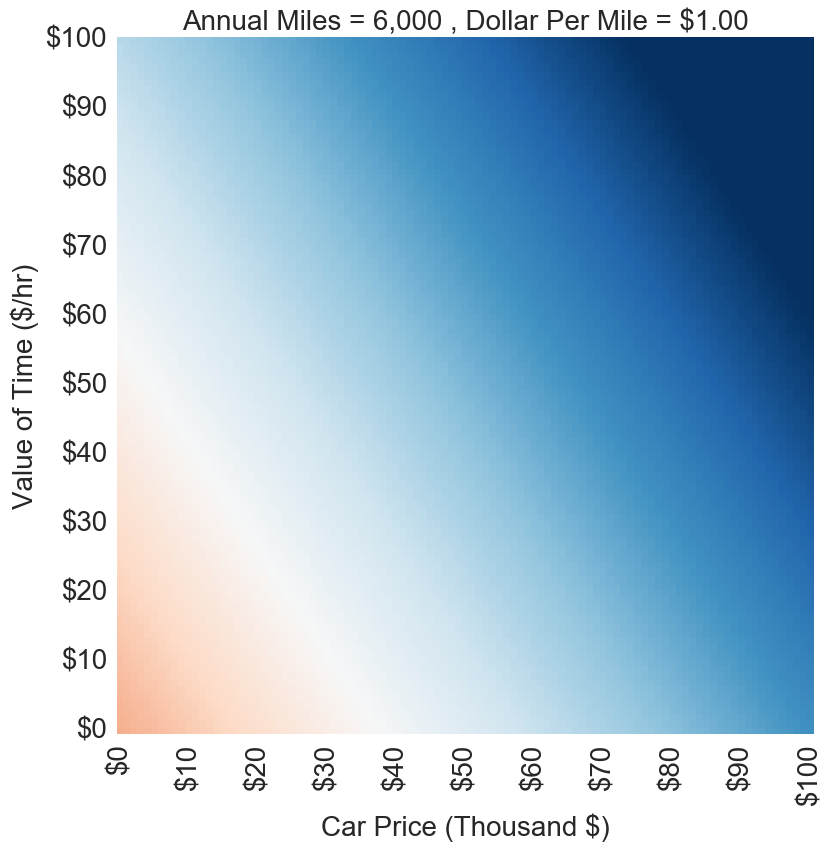

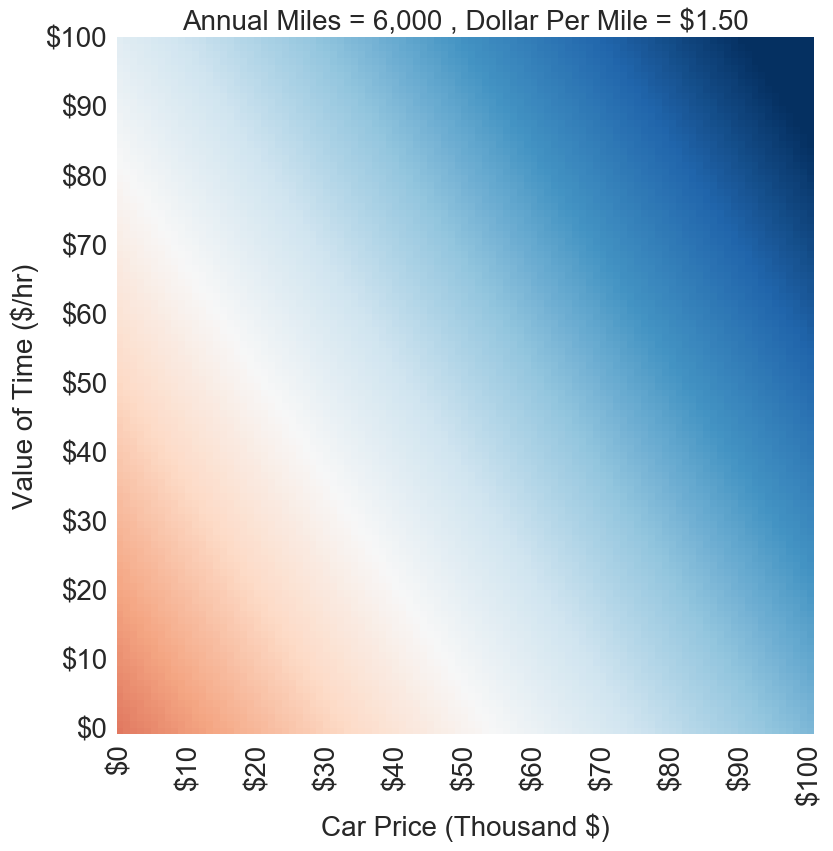

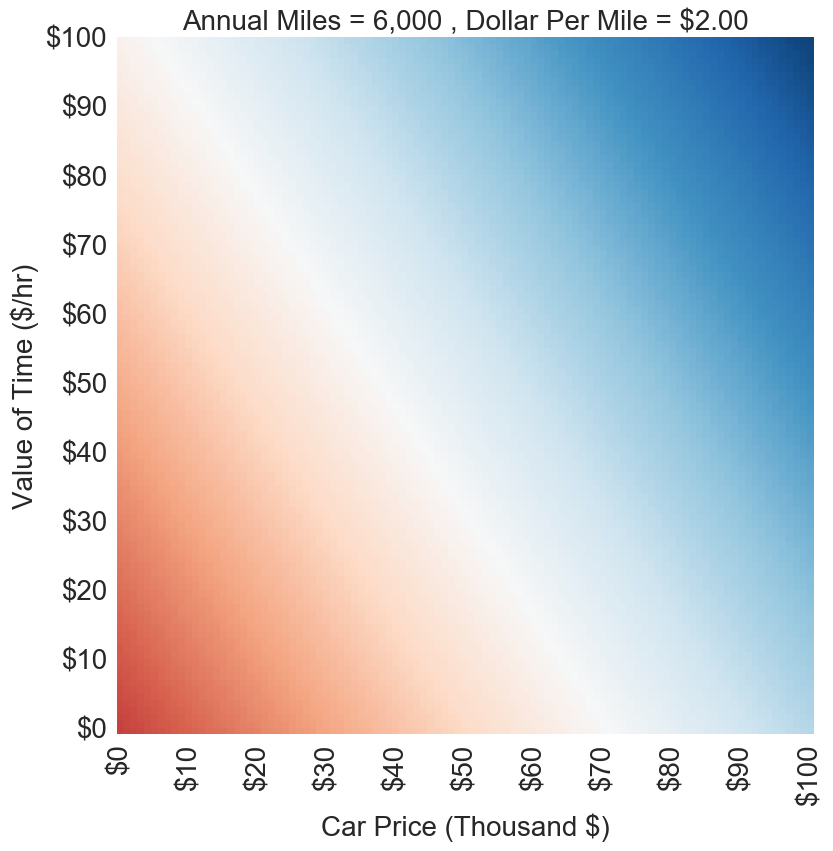

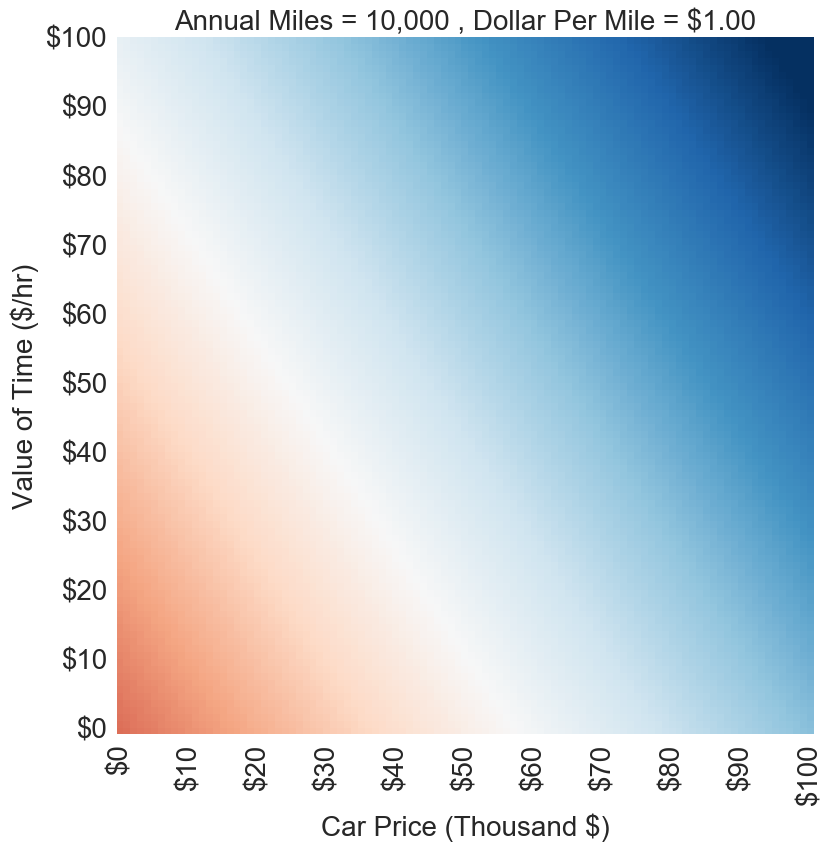

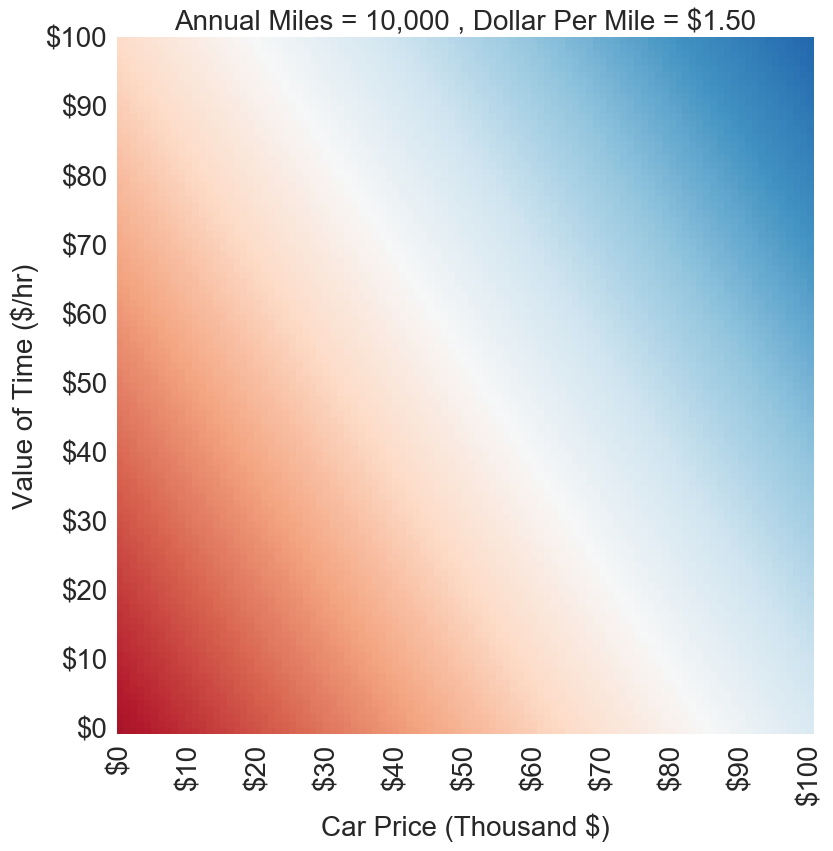

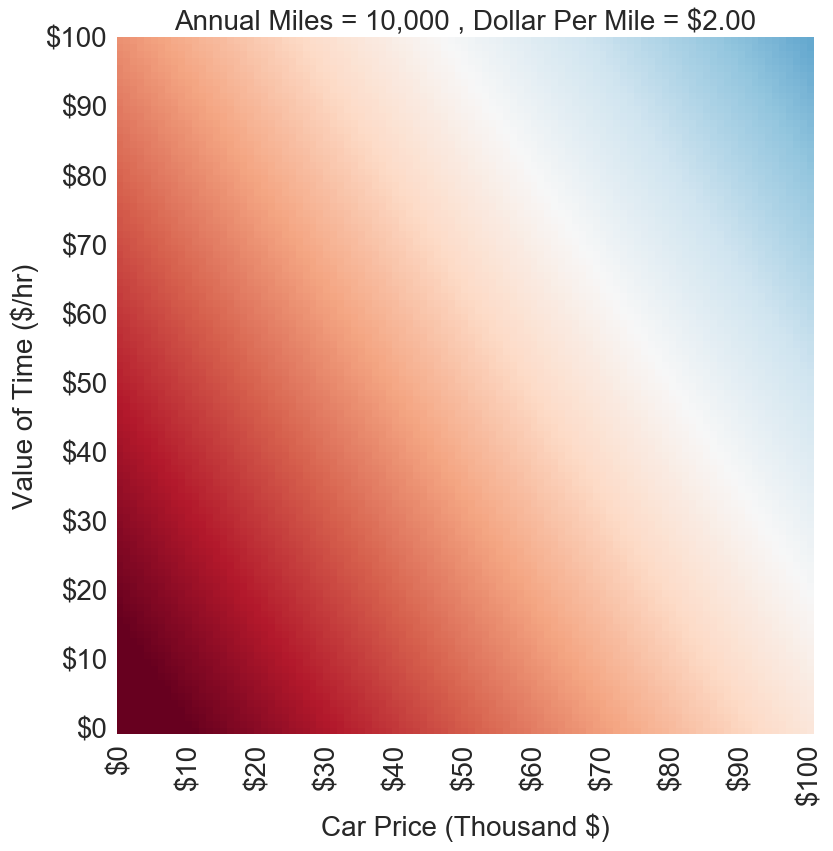

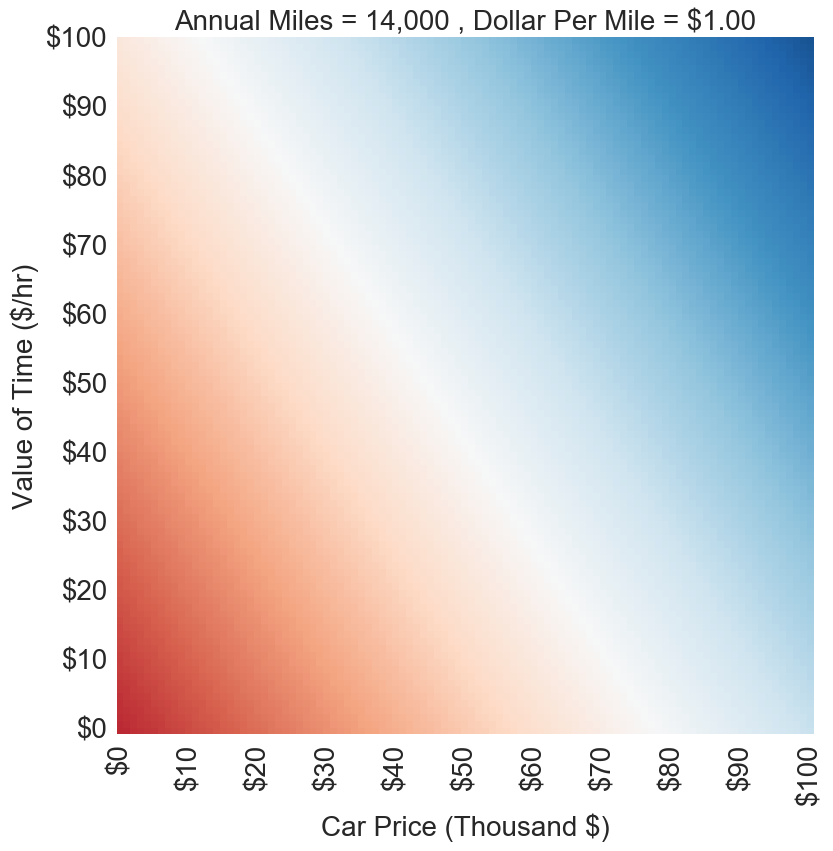

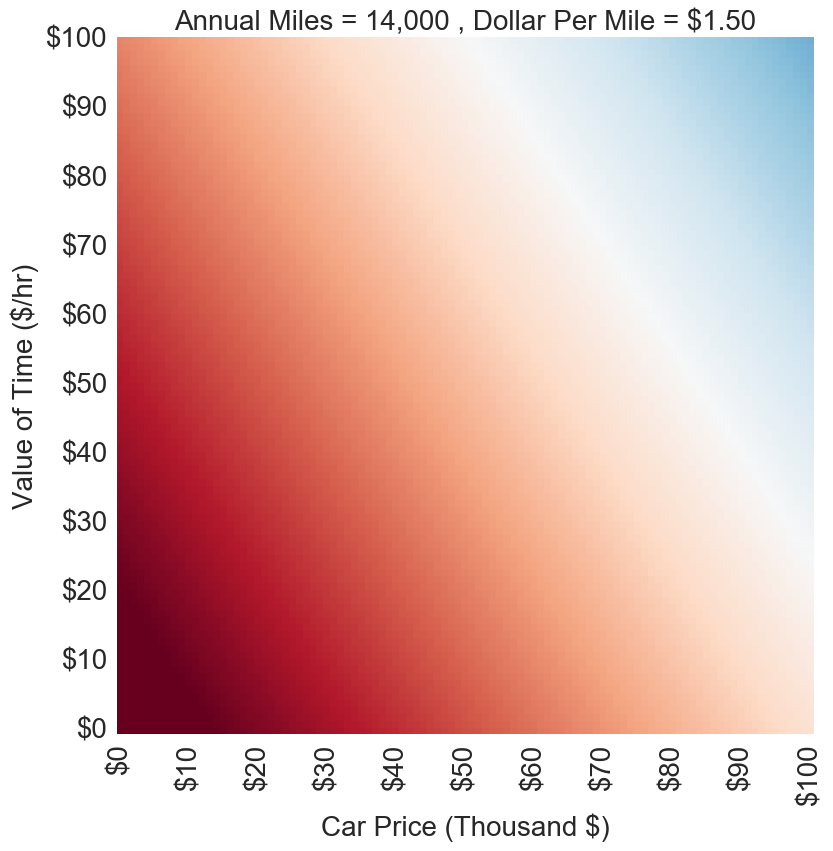

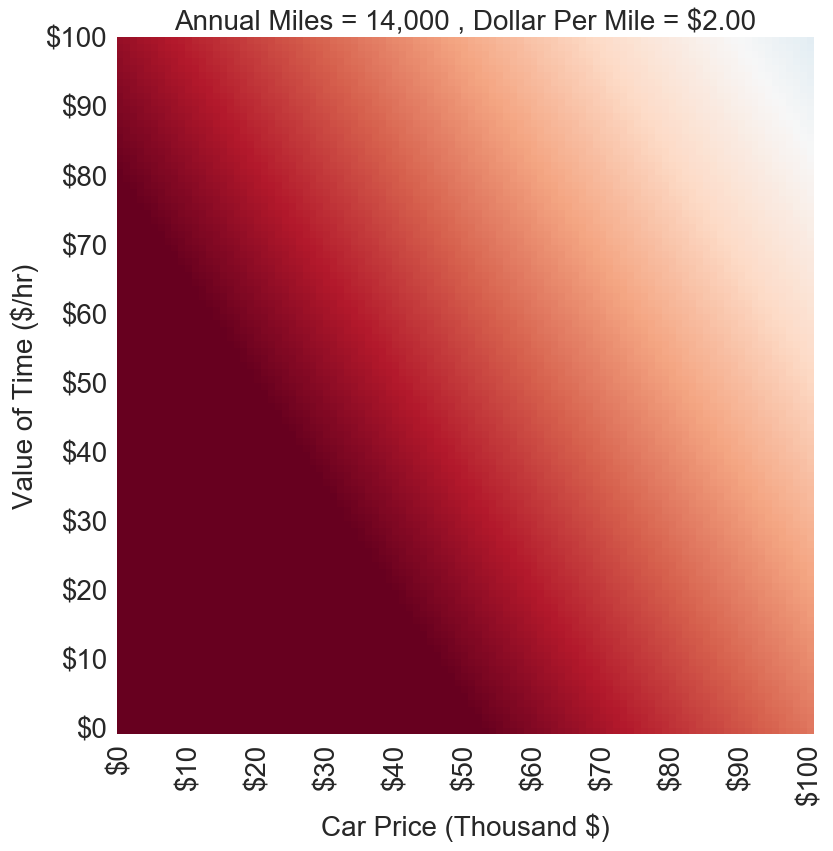

In [15]:
count = 0
for j in range(0,len(inputvar)):
    ############################################################################################Used for heat mapping
    count = count + 1
    Time_Worth = np.arange(0, 101)
    #Time_Worth = 60

    Car_Price = np.arange(0, 100001, 1000)
    #Car_Price = 24000

    #Annual_Miles_Avg = np.linspace(6000,12000,num = 61, endpoint= False)
    Annual_Miles_Avg = inputvar[j][0]

    ##########add if statment to automatically pick 
    variables = cartesian((Time_Worth, Car_Price)) #creates permutation of all inputs in a matrix

    #Creates input_list with all permutations of the 2 variables plus constant third variable
    nrow,ncol = variables.shape
    input_list = np.ndarray(shape = (nrow,ncol+1))
    input_list.fill(Annual_Miles_Avg)
    input_list[:,:-1] = variables
    input_list.astype(float)

    ##############################################################################################################
    #EconomicParameters
    Model_Length = 20 # as years
    MPG = 25
    Fuel_Price = 2.5  # as $/gal
    Trip_Time_Avg = 10  # as num
    Num_Trips_Avg = 3  # as num

    MPG = float(MPG)    
    Fuel_Price = float(Fuel_Price)
    Trip_Time_Avg = float(Trip_Time_Avg)
    Num_Trips_Avg = float(Num_Trips_Avg)

    if isinstance(Time_Worth, np.ndarray):
        Time_Worth = [float(Time_Worth[i]) for i in range(0,Time_Worth.size-1)] 
    else: 
        Time_Worth = float(Time_Worth)

    if isinstance(Annual_Miles_Avg, np.ndarray):
        Annual_Miles_Avg = [float(Annual_Miles_Avg[i]) for i in range(0,Annual_Miles_Avg.size-1)] 
    else:
        Annual_Miles_Avg = float(Annual_Miles_Avg)

    if isinstance(Car_Price, np.ndarray):
        Car_Price = [float(Car_Price[i]) for i in range(0,Car_Price.size-1)] 
    else:
        Car_Price = float(Car_Price)

    #Global Inputs, Calculated
    Daily_Miles_Avg = Annual_Miles_Avg/365   # as miles/day
    Trip_Dist_Avg = Daily_Miles_Avg/Num_Trips_Avg
    #Drive_Time_Avg = Trip_Time_Avg*Num_Trips_Avg   # as minutes
    #Used in Car+_Ownership now

    ######################################################################################################################
    #Traditional Car Ownership Model 
    #Expenses to Purchase Car, Hardcoded
    #Car_Price = 24000 #as $
    Sales_Tax_Percent = .0625 #as decimal percent
    Purchase_Fees = 250  # as $ for maybe title transfer
    Down_Payment = 5000 #as $
    Loan_Terms = 48 #as months
    AIR = .05 #as decimal percent

    Sales_Tax_Percent = float(Sales_Tax_Percent)
    Purchase_Fees = float(Purchase_Fees)
    Down_Payment = float(Down_Payment)
    Loan_Terms = float(Loan_Terms)
    AIR = float(AIR)
    #Expenses to Purchase Car, Calculated
    #Sales_Tax_Num = Car_Price*Sales_Tax_Percent #as $
    #Loan_Amount = Car_Price - Down_Payment #as $
    #used in car_ownership now
    MIR = AIR/12
    #Monthly_PMT = (MIR*Loan_Amount*(1+MIR)**Loan_Terms)/(((1+MIR)**Loan_Terms)-1)
    #included in Car_Ownership Model

    ##################################################################################################################
    #Direct Expenses to Own Car Avg'd over 10 years
    Maint_Repairs_Exp = 1250 # as $
    Insurance_Exp = 1000 # as $
    Registr_Taxes_Exp = 150 # as $
    Parking_Exp = 200 # as $
    Maint_Repairs_Exp = float(Maint_Repairs_Exp)
    Insurance_Exp = float(Insurance_Exp)
    Registr_Taxes_Exp = float(Registr_Taxes_Exp)
    Parking_Exp = float(Parking_Exp)


    #Now in Car_Ownership
    #Fuel_Exp = [Annual_Miles_Avg[i]/MPG[i]*Fuel_Price[i] for i in range(0,simsize-1)]
    #Total_DE = Maint_Repairs_Exp+Insurance_Exp+Registr_Taxes_Exp+Parking_Exp+Fuel_Exp

    #####################################################################################################################
    #-----------Uber Model
    #-----Expenses for Hiring
    Fare_Base = 2 # as $
    Fare_Per_Mile = inputvar[j][1] # as $/mile
    Fare_Per_Minute = .20 # as $/minute
    #In Uber_Model

    #In Uber_Model
    #Uber_Exp_Annual = Uber_Exp_Daily*365
    Min_Fee_Uber = 6.0 # as $
    Cancel_Fee_Uber = 8.0 # as $
    Fare_Base = float(Fare_Base)
    Fare_Per_Mile = float(Fare_Per_Mile)
    Fare_Per_Minute = float(Fare_Per_Minute)

#     Uber_Trip_Avg = Fare_Base+Fare_Per_Mile*Trip_Dist_Avg+Fare_Per_Minute*Trip_Time_Avg
#     Uber_Trip_Avg = float(Uber_Trip_Avg)
#     Uber_Exp_Daily =  Uber_Trip_Avg*Num_Trips_Avg


    #Uber_Exp_Annual = float(Uber_Exp_Annual)
    Min_Fee_Uber = float(Min_Fee_Uber)
    Cancel_Fee_Uber = float(Cancel_Fee_Uber)

    #---Annual Value of Time
    Wait_Time_Uber_Avg = 5.0 # as minutes 
    Wait_Time_Uber_Avg = float(Wait_Time_Uber_Avg)
    #Add to Uber Model
    #Val_Time_Daily_Uber = (Wait_Time_Uber_Avg*Num_Trips_Avg)/60*Time_Worth
    #Val_Time_Annual_Uber = Val_Time_Daily_Uber*365
    ###############################################################################################################
    #Annual Indirect Expenses Avg'd over 10 years
    Property_Tax_Garage_IDE= 300 # as $ Garage might be worth $15k; if property tax 2%; garage $300/year
    Garage_Repair_IDE_Ann = 200 # as $
    Property_Tax_Garage_IDE = float(Property_Tax_Garage_IDE)
    Garage_Repair_IDE_Ann = float(Garage_Repair_IDE_Ann)
    Total_IDE = Property_Tax_Garage_IDE+Garage_Repair_IDE_Ann

    #Annual Value of Time
    Walk_Time_Avg= 10 # as minutes
    Walk_Time_Avg = float(Walk_Time_Avg)
    #Val_Drive_Time_Daily = Time_Worth*Drive_Time_Avg/60
    #Val_Walk_Time_Daily = Walk_Time_Avg/60*Time_Worth
    #Val_Time_Daily_Car =Val_Drive_Time_Daily+Val_Walk_Time_Daily
    #Val_Time_Annual_Car = (Val_Time_Daily_Car)*365
    #used in CarOwnership Function now
    #---------------------------------------------------------------------------

    ####2D Heat Map
    output_year = (7,)    
    nrow, ncol = input_list.shape
    Decision = np.zeros((1,nrow))

    for i in range(0,nrow):
        a,b,c = Car_Ownsership_Expense_Model(outputyears=output_year,annualmiles = input_list[i,2],carprice=input_list[i,1],timeworth= input_list[i,0])
# def Uber_Expense_Model(outputyears = (7,10,15,20), annualroi = 5,
#                        farebase = Fare_Base, farepermile = Fare_Per_Mile, farepermin = Fare_Per_Minute,
#                        annualmiles = Annual_Miles_Avg, triptime = Trip_Time_Avg, numtrips = Num_Trips_Avg,
#                        timeworth= Time_Worth, waittime = Wait_Time_Uber_Avg, carprice = Car_Price): 
        d = Uber_Expense_Model(outputyears= output_year,timeworth=input_list[i,0],
        annualmiles=input_list[i,2],carprice = input_list[i,1],farepermile = Fare_Per_Mile)

        Decision[0,i] = a[0]-d

    #Appends decision onto input_list array
    Decision = Decision.reshape((-1,1)) #reshape Decisions from row vector to column vector
    output = np.column_stack((input_list,Decision))
    output = pd.DataFrame(output)
    output.columns = ['Time Worth', 'Car Price', 'Annual Miles Driven', 'Decision']
    output = output.astype(int)

    #Min and max output
    decisionmin.append(min(output.ix[:,3]))
    decisionmax.append(max(output.ix[:,3]))
    cbarmax = 150000
    cbarmin = -150000
    ############################################################################################################
    #output.sort('Time_Worth', ascending=True)
    #output.head(n = 30)
    pivot_table = output.pivot('Time Worth','Car Price','Decision')
    pivot_table = pivot_table.sort_index(0, ascending= False)

    #pivot_table.head(n = 50) #pivot_table.head(5)[pivot_table.columns[300:]] #pivot_table.ix[, 50:]

    plt.figure(figsize=(9,9))
    Annual_Miles_Avg = int(Annual_Miles_Avg)
    # x_tick_labels = ['${}'.format(i / 1000) for i in range (min(pivot_table.columns), max(pivot_table.columns) + 1, 10000)]

    plt.title('Annual Miles = {:,}'.format(Annual_Miles_Avg) + ' , Dollar Per Mile = ${0:.2f}'.format(inputvar[j][1]), size = 20)
    ax = sns.heatmap(pivot_table, annot=False, fmt="d", square = False, cmap = 'RdBu', center = 0, linecolor = 'Black',
                yticklabels=10, xticklabels=10, cbar_kws={"orientation": "horizontal"},
                vmin = cbarmin, vmax = cbarmax, cbar = False)

    #linewidths=.0000001 #plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine") #plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
    #plt.legend(loc='upper left') #plt.xticks(rotation = 45) # print('{} {}'.format(len(car_price), len(time_worth)))

#     cbar = ax.collections[0].colorbar
#     cbarticks = np.arange(cbarmin,cbarmax+1,50000)
#     print(cbarticks)
#     cbar.set_ticks(cbarticks)
#     cbar.set_ticklabels(['$-150','$-100','$-50','$0','$50', '$100','$150'])
#     cbar.set_label('Own Car                                                                Uber',size = 15)
#     #cbar.set_ticklabels(['${}'.format(int(i.get_text())/1000) for i in cbarticks.size])

    ax.set_xticklabels(['${}'.format(int(i.get_text())/ 1000) for i in ax.get_xticklabels()])
    ax.set_yticklabels(['${}'.format(int(i.get_text()) ) for i in ax.get_yticklabels()])
    ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0)
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 


    plt.xlabel('Car Price (Thousand $)', size = 20 )
    plt.ylabel('Value of Time ($/hr)', size = 20)
    plt.savefig('Rideshare Heat Map ' + str(count) +'.png', bbox_inches='tight')

    
#####################################################################################################################

In [6]:
print(max(decisionmax))
print(min(decisionmin))


188051
-226857


In [7]:
#Distributions
#Varied 

#print(scipy.stats.norm.pdf(.5,0,1))
#print(stats.norm.__doc__)
#rv = norm.rvs(size=1000)
#ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
#ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
#ax.legend(loc='best', frameon=False)
#plt.show()

rv = norm
dir(rv)
norm.cdf(0)
#norm.cdf(np.array([-1., 0, 1]))
#norm.rvs(size = 3)

#Used to seed a global variable to fix the output
np.random.seed()

#Test using scipy random
#Time_Worth = rv.rvs(loc =100, scale = 30,size=1000000)
#Time Worth could be linked or proxied off of income per household≤
#Car_Price = rv.rvs(loc = 24000, scale = 2400,size=1000000)
#Annual_Miles_Avg = rv.rvs(loc = 9000, scale =900,size=1000000)

#Simulation Size 
#10000000 is good number for normal distribution of inputs
#100000 is good for MC
simsize = 10000

#Test using np random
#Time_Worth = npr.normal(loc =150, scale = 30,size=simsize)
#Car_Price = npr.normal(loc = 24000, scale = 2400,size=simsize)
#Annual_Miles_Avg = npr.normal(loc = 9000, scale =900,size=simsize)

#plt.hist(Time_Worth, bins=1000, histtype='step', normed=True, linewidth=1)
#plt.show()

#commute_times = pd.read_csv('/commute_times_us_zipcode_2011.csv', header = True)

#plt.plot(Time_Worth,'ro')
#plt.ylabel('some numbers')
#plt.show()

	#Time Worth - data for average salary distribution in different metro regions 
	#Car Price - hard to get more resolution
	#Average Annual Mile Driven 

In [8]:
#Monte Carlo Simulation


# output_year = (10,)
# Decision = np.zeros((1,simsize))

# for i in range(0,simsize-1):
#     a,b,c = Car_Ownsership_Expense_Model(outputyears=output_year,annualmiles = Annual_Miles_Avg[i],carprice=Car_Price[i],timeworth= Time_Worth[i])
#     d = Uber_Expense_Model(outputyears= output_year,timeworth=Time_Worth[i],annualmiles=Annual_Miles_Avg[i],carprice = Car_Price[i])

#     #print(Decision.shape)
#     #print(a[0]-d)
#     Decision[0,i] = a[0]-d

    
# Decision = np.transpose(Decision)
# plt.ylabel('Frequency')
# plt.xlabel('NPV Difference')
# plt.hist(Decision, bins=1000, histtype='step', normed=False, linewidth=1)
# plt.show()

# mean = np.mean(Decision)
# print(mean)

In [9]:
#print(Decision)
#print(Decision.shape)
#max = np.amax(Decision)
#min = np.amin(Decision)
#print(max)
#print(min)
#print(max-min)
#print((max-min)/1000)